In [1]:
import pandas as pd
house = pd.read_csv("Mumbai.csv")
house.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Unnamed: 40,Unnamed: 41,Location.1
0,4400000,1100,Kharghar,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,Kharghar
1,4641000,1105,Kharghar,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,Kharghar
2,4641000,1105,Kharghar,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,Kharghar
3,4641000,1105,Kharghar,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,Kharghar
4,4641000,1105,Kharghar,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,Kharghar


array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'No. of Bedrooms'}>,
        <AxesSubplot:title={'center':'Resale'}>,
        <AxesSubplot:title={'center':'MaintenanceStaff'}>,
        <AxesSubplot:title={'center':'Gymnasium'}>],
       [<AxesSubplot:title={'center':'SwimmingPool'}>,
        <AxesSubplot:title={'center':'LandscapedGardens'}>,
        <AxesSubplot:title={'center':'JoggingTrack'}>,
        <AxesSubplot:title={'center':'RainWaterHarvesting'}>,
        <AxesSubplot:title={'center':'IndoorGames'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Intercom'}>,
        <AxesSubplot:title={'center':'SportsFacility'}>,
        <AxesSubplot:title={'center':'ATM'}>,
        <AxesSubplot:title={'center':'ClubHouse'}>,
        <AxesSubplot:title={'center':'School'}>,
        <AxesSubplot:title={'center':'24X7Security'}>],
       [<AxesSubplot:title={'cent

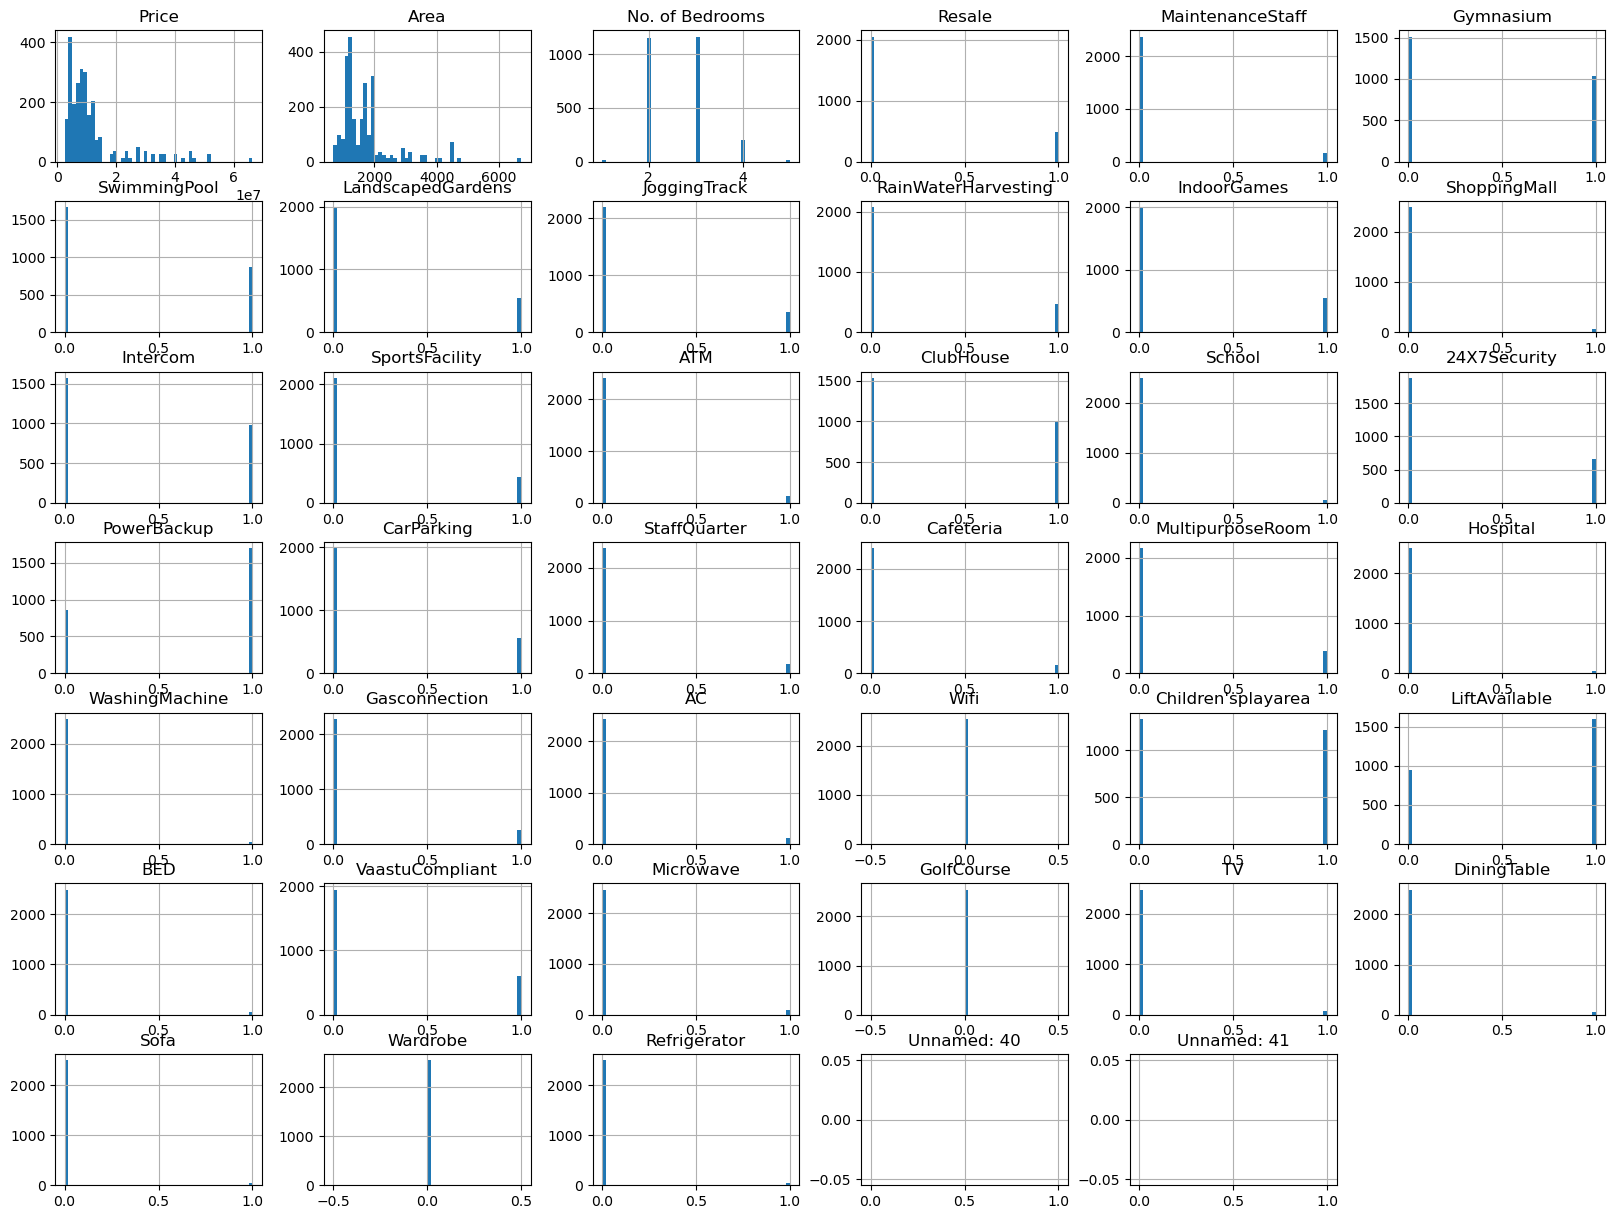

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
house.hist(bins = 50 , figsize = (20 , 15))

In [3]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(house , test_size = 0.3 , random_state = 42)
print("Rows in test : " , len(test_set) , "\nRows in training set : " , len(train_set))

Rows in test :  764 
Rows in training set :  1780


In [4]:
corr_mat = house.corr()
corr_mat['Price'].sort_values(ascending = False)

Price                  1.000000
Area                   0.947546
No. of Bedrooms        0.753698
Resale                 0.345791
AC                     0.289491
JoggingTrack           0.244966
StaffQuarter           0.239217
SwimmingPool           0.208041
Cafeteria              0.187120
CarParking             0.184750
24X7Security           0.163528
Gasconnection          0.160205
Intercom               0.143659
SportsFacility         0.140523
Gymnasium              0.137355
DiningTable            0.133363
Sofa                   0.133363
WashingMachine         0.133363
Refrigerator           0.133363
RainWaterHarvesting    0.131574
ClubHouse              0.126385
MultipurposeRoom       0.113888
VaastuCompliant        0.103351
BED                    0.098899
IndoorGames            0.085371
TV                     0.081524
Microwave              0.050625
ATM                    0.041697
LandscapedGardens      0.034756
Children'splayarea     0.033637
ShoppingMall           0.024856
School  

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Area', ylabel='Price'>,
        <AxesSubplot:xlabel='No. of Bedrooms', ylabel='Price'>,
        <AxesSubplot:xlabel='Resale', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='Area'>,
        <AxesSubplot:xlabel='Area', ylabel='Area'>,
        <AxesSubplot:xlabel='No. of Bedrooms', ylabel='Area'>,
        <AxesSubplot:xlabel='Resale', ylabel='Area'>],
       [<AxesSubplot:xlabel='Price', ylabel='No. of Bedrooms'>,
        <AxesSubplot:xlabel='Area', ylabel='No. of Bedrooms'>,
        <AxesSubplot:xlabel='No. of Bedrooms', ylabel='No. of Bedrooms'>,
        <AxesSubplot:xlabel='Resale', ylabel='No. of Bedrooms'>],
       [<AxesSubplot:xlabel='Price', ylabel='Resale'>,
        <AxesSubplot:xlabel='Area', ylabel='Resale'>,
        <AxesSubplot:xlabel='No. of Bedrooms', ylabel='Resale'>,
        <AxesSubplot:xlabel='Resale', ylabel='Resale'>]], dtype=object)

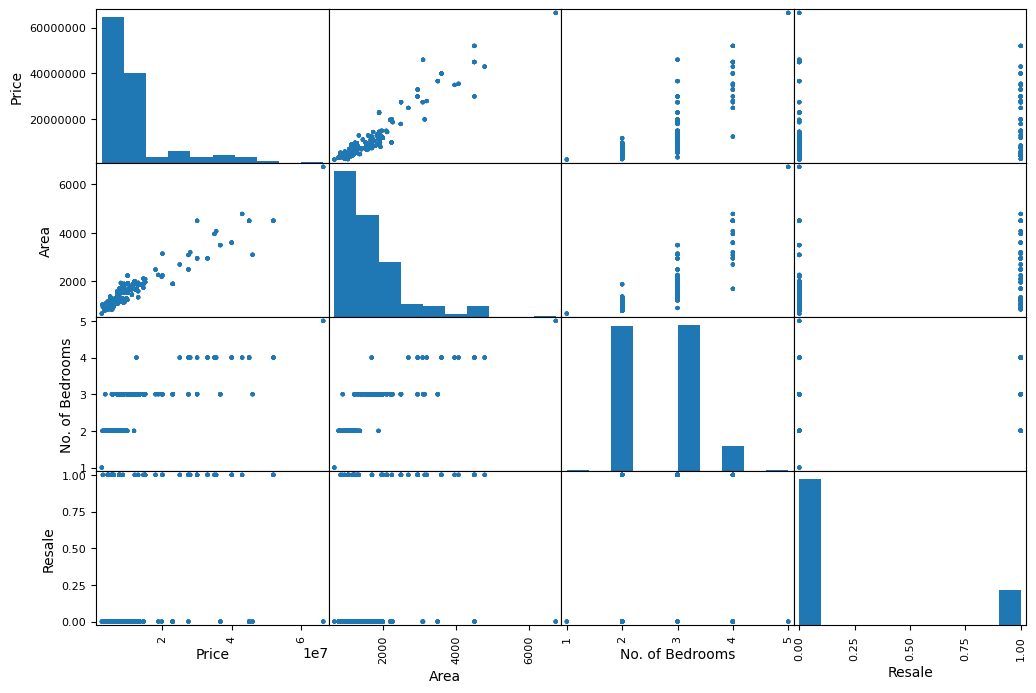

In [5]:
from pandas.plotting import scatter_matrix
attr = ["Price" , "Area" , "No. of Bedrooms" , "Resale"]
scatter_matrix(house[attr] , figsize = (12 , 8))

In [6]:
newDF = house[["Area" , "No. of Bedrooms", "PowerBackup"  , "Gasconnection" ,"AC" , "Location" , "Price"]]
newDF.shape

(2544, 7)

<AxesSubplot:>

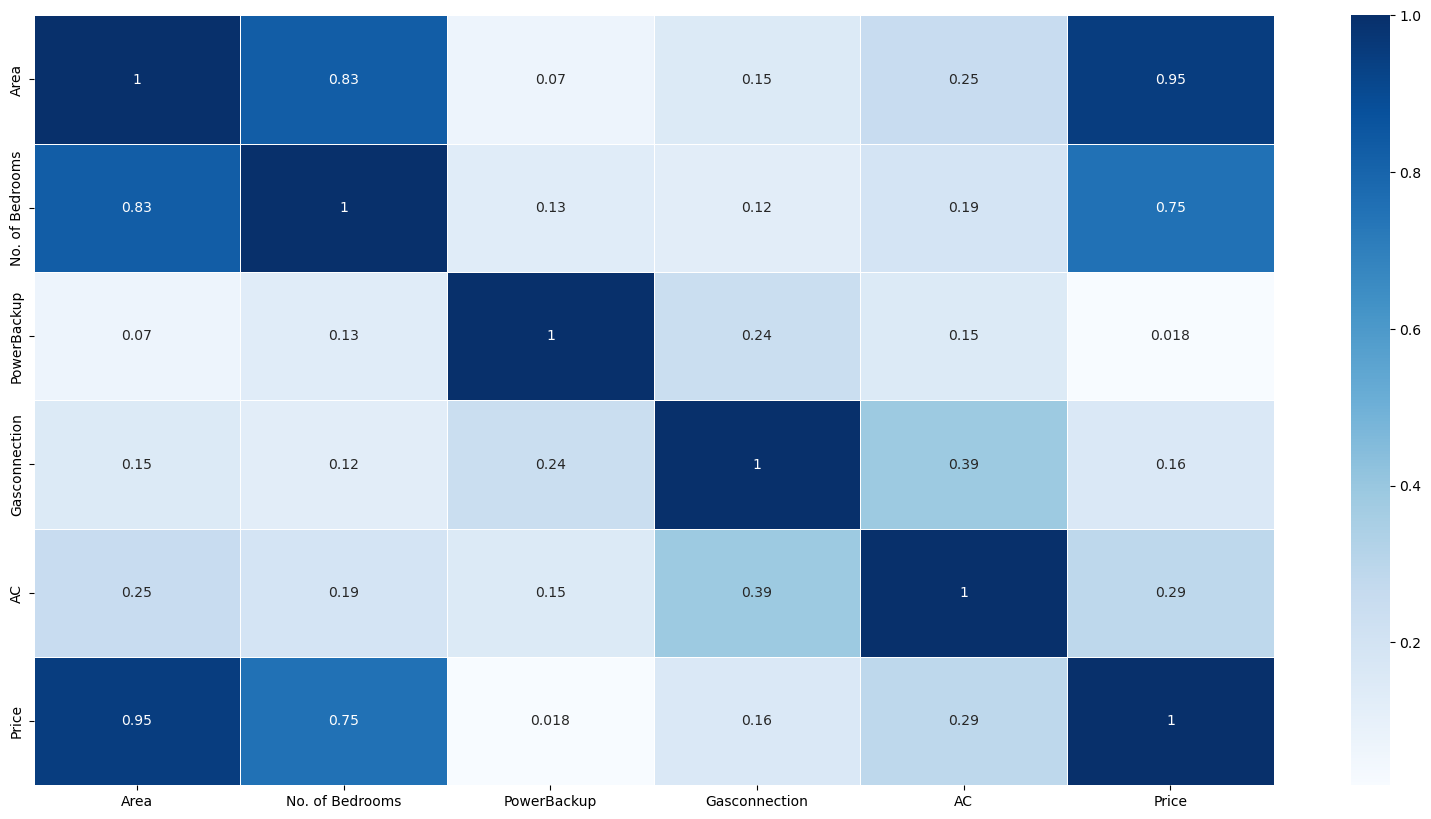

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(20,10))
fig = sns.heatmap(newDF.corr(), cmap='Blues' , annot = True , linewidths=0.5)
fig

In [8]:
y = newDF.Price
x = newDF.drop(["Location" , 'Price'],axis='columns')
x.head(2)

,Area,No. of Bedrooms,PowerBackup,Gasconnection,AC
0,1100,2,1,0,0
1,1105,2,1,0,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [18]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8898031717239193

In [19]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.88980317, 0.89152891, 0.9005758 , 0.88129405, 0.92241192])

In [20]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

m

,model,best_score,best_params
0,linear_regression,0.908072,{'normalize': True}


In [21]:
import pickle
with open('Mumbai_home_prices_model.pkl','wb') as f:
    pickle.dump(lr_clf,f)